In [1]:
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras.optimizers import Adam
from keras. models import load_model
from keras. layers import LSTM
from keras.utils import plot_model


In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf


In [3]:
START = "2002-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.560101,212976
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.173424,153576
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.231056,822776
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.231056,0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.168106,811856


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,38.724998,40.000000,38.724998,39.700001,212976
1,39.750000,40.387501,38.875000,39.162498,153576
2,39.250000,39.250000,35.724998,36.462502,822776
3,36.462502,36.462502,36.462502,36.462502,0
4,36.275002,38.000000,35.750000,36.375000,811856


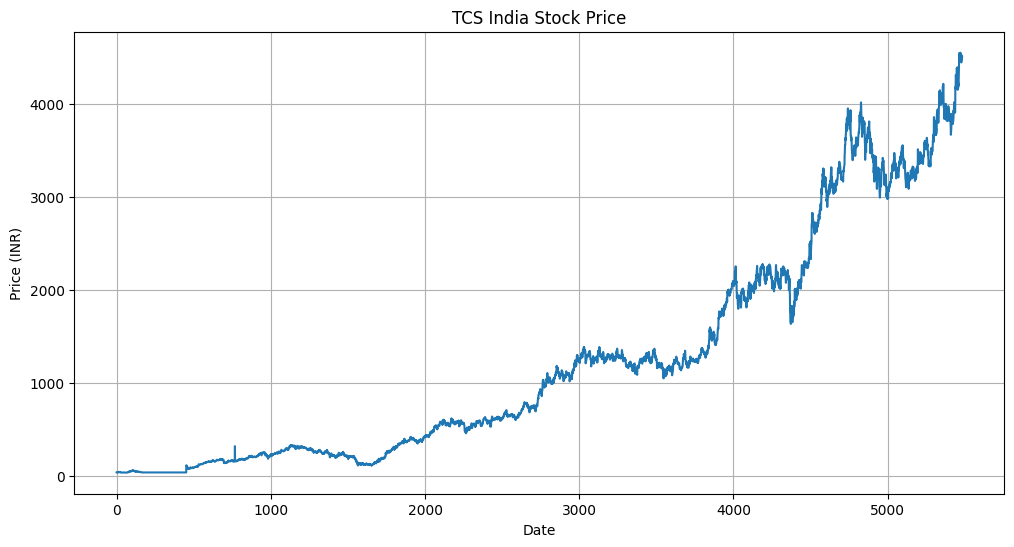

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [7]:
df

,Open,High,Low,Close,Volume
0,38.724998,40.000000,38.724998,39.700001,212976
1,39.750000,40.387501,38.875000,39.162498,153576
2,39.250000,39.250000,35.724998,36.462502,822776
3,36.462502,36.462502,36.462502,36.462502,0
4,36.275002,38.000000,35.750000,36.375000,811856
...,...,...,...,...,...
5480,4442.450195,4539.950195,4440.450195,4507.850098,1385591
5481,4521.450195,4549.350098,4471.250000,4479.350098,1325919
5482,4510.250000,4532.600098,4431.299805,4517.700195,2742216
5483,4530.000000,4547.000000,4505.000000,4522.600098,1458786


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5480    4073.057490
5481    4079.122991
5482    4085.679993
5483    4092.643994
5484    4099.130493
Name: Close, Length: 5485, dtype: float64

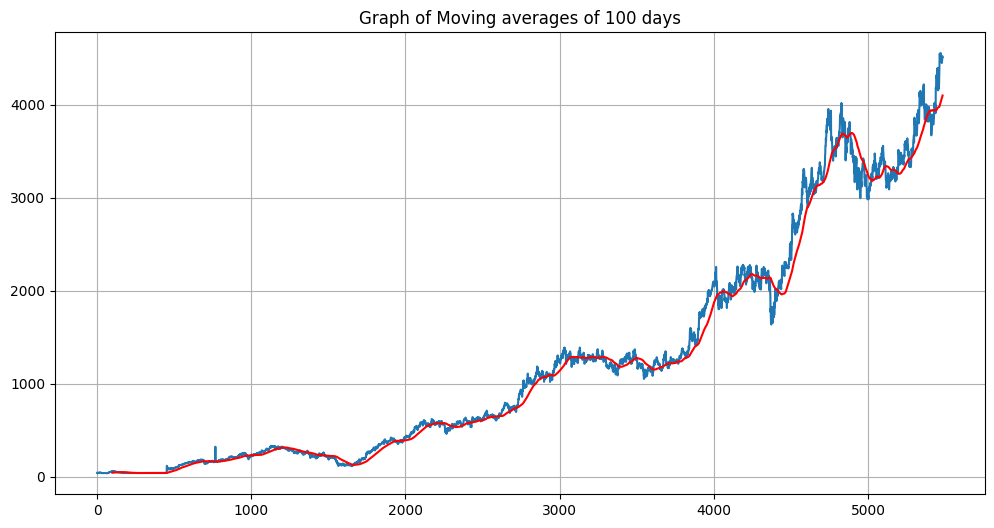

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')  # Assuming ma100 is your 100-day moving average
plt.grid(True)
plt.title("Graph of Moving averages of 100 days")
plt.show()


In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5480    3970.477501
5481    3975.385001
5482    3980.461252
5483    3985.476252
5484    3990.491503
Name: Close, Length: 5485, dtype: float64

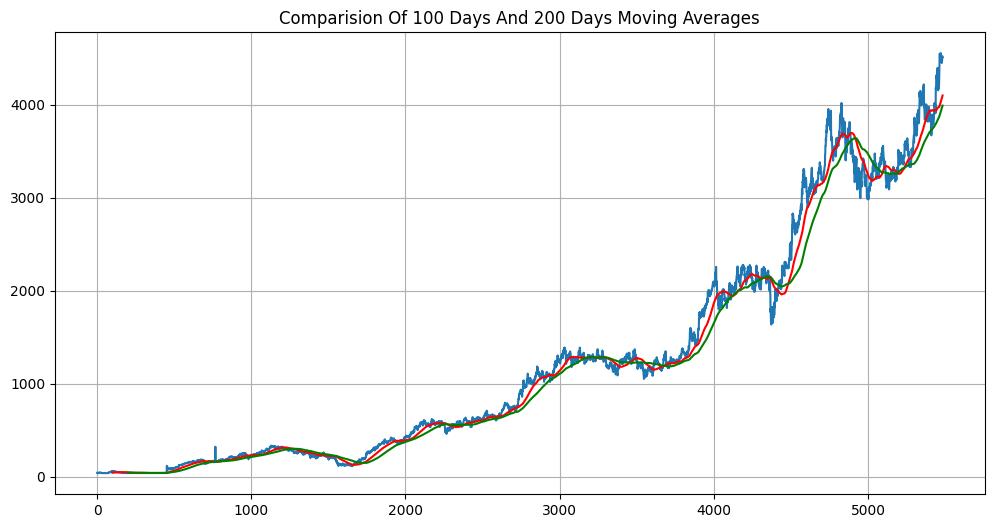

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')
plt.show()

In [12]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(3839, 7)
(1646, 7)


In [13]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.560101,212976
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.173424,153576
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.231056,822776
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.231056,0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.168106,811856


In [14]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3839,2018-01-12,1402.500000,1402.500000,1370.275024,1388.175049,1231.043457,3360314
3840,2018-01-15,1388.574951,1404.000000,1367.525024,1373.050049,1217.630127,1457214
3841,2018-01-16,1378.000000,1430.824951,1375.275024,1425.425049,1264.076782,4267752
3842,2018-01-17,1435.000000,1462.500000,1431.074951,1444.474976,1280.970337,4280806
3843,2018-01-18,1448.500000,1466.500000,1434.025024,1459.099976,1293.940063,2209478


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[3.08884699e-03],
       [2.69588570e-03],
       [7.21951284e-04],
       ...,
       [9.64322887e-01],
       [1.00000000e+00],
       [9.94114709e-01]])

In [18]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 


In [19]:
x_train.shape

(3739, 100, 1)

In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\saida\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 88s 470ms/step - loss: 0.0755 - mean_absolute_error: 0.1833
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 77s 418ms/step - loss: 0.0085 - mean_absolute_error: 0.0606
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 88s 463ms/step - loss: 0.0086 - mean_absolute_error: 0.0613
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - loss: 0.0072 - mean_absolute_error: 0.0558
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 80s 423ms/step - loss: 0.0070 - mean_absolute_error: 0.0564
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 31s 269ms/step - loss: 0.0070 - mean_absolute_error: 0.0568
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - loss: 0.0055 - mean_absolute_error: 0.0482
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 85s 491ms/step - loss: 0.0050 - mean_absolute_error: 0.0464
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 85s 512ms/step - loss: 0.0048 - mean_absolute_error: 0.0456
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 76s 452ms/step - loss: 0.0048 - mean_absolute_error: 

In [24]:
model.save('keras_model.h5')

In [29]:
test_close.shape
test_close

array([[1388.17504883],
       [1373.05004883],
       [1425.42504883],
       ...,
       [4517.70019531],
       [4522.60009766],
       [4513.25      ]])

In [30]:
past_100_days = pd.DataFrame(train_close[-100:])

In [35]:
test_df=pd.DataFrame(test_close)

In [37]:
import pandas as pd

# Use pd.concat() instead of append()
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [38]:
final_df.head()

,0
0,1264.400024
1,1248.775024
2,1244.724976
3,1248.300049
4,1243.650024


In [45]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.01485496],
       [0.01017535],
       [0.00896238],
       ...,
       [0.98920325],
       [0.99067075],
       [0.98787044]])

In [47]:
input_data.shape

(1746, 1)

In [50]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(1646, 100, 1)
(1646,)


In [52]:
# Making predictions

y_pred = model.predict(x_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 233ms/step


In [53]:
y_pred.shape

(1646, 1)

In [54]:
y_test

array([0.05192501, 0.04739514, 0.06308121, ..., 0.98920325, 0.99067075,
       0.98787044])

In [55]:
y_pred

array([[0.08439778],
       [0.08511424],
       [0.08594714],
       ...,
       [0.9138601 ],
       [0.91491413],
       [0.9167081 ]], dtype=float32)

In [56]:
scaler.scale_

array([0.0002995])

In [57]:
scale_factor=1/0.00041967
y_pred=y_pred * scale_factor
y_test-y_test * scale_factor

array([ -123.67625934,  -112.88691011,  -150.24837562, ...,
       -2356.10863781, -2359.60396062, -2352.93411144])

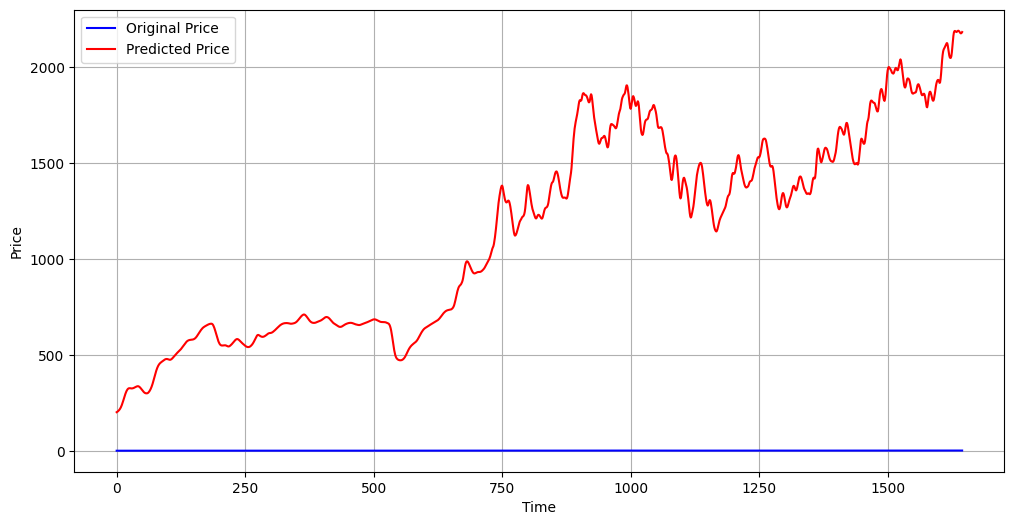

In [58]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 232507.68%


In [60]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: -28464546.01637186


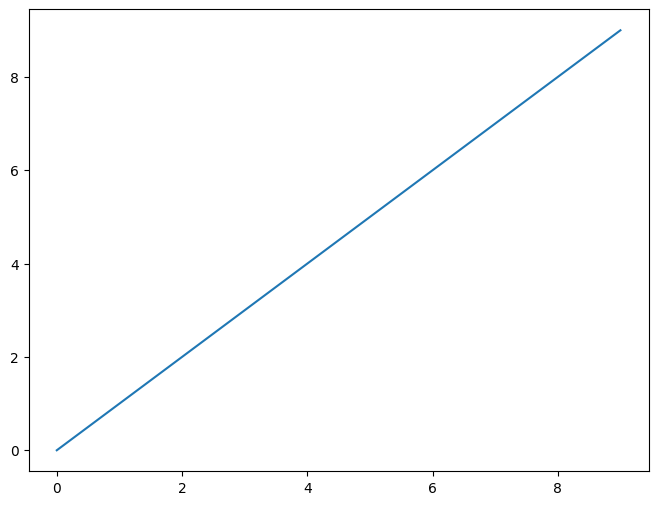

In [63]:
import matplotlib.pyplot as plt

# Check if the data being plotted is correct
# For instance, x and y must have appropriate values
x = range(10)  # Example x values
y = range(10)  # Example y values

# Set the figure size explicitly
plt.figure(figsize=(8, 6))  # Specify width and height in inches

# Plot your data
plt.plot(x, y)

# Save the figure or display it
plt.savefig("plot.png")  # Saving to file if needed
plt.show()  # Display the plot


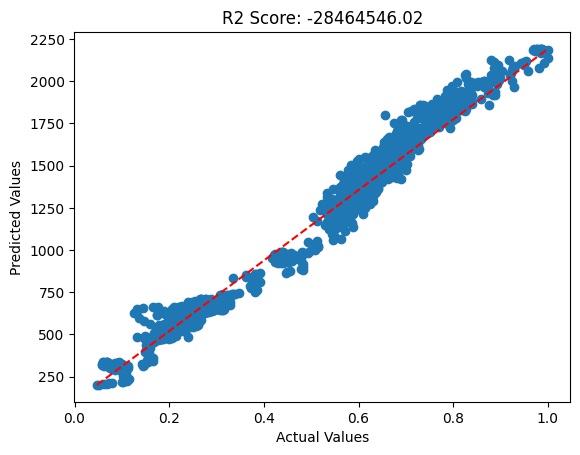

In [62]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()
